**Tyler Hilbert, Larry Purnell, Sandy Rath, Daniel Resnick | Seaborn In-Class Presentation | February 19, 2025**

This file serves as the **step-by-step** view of our coding demonstration. This is a broken down version of the original presentation to provide guidance on how to walk through every step and what could be added along the way. This will help during the demonstration to show how we can progressively add more to the visualizations. Every section has comments (indicated via #) showing who is presenting, and a brief discussion of what is being discussed. Please refer to the **complete** variant of this file for what the final product looks like.

Intro Part:
- Go over what Seaborn is (Sandy)
- Why it is different than Matplotlib (Daniel)
- Use cases for Seaborn (Larry)
- Downloading Seaborn and the terminal thing (Tyler)

In [1]:
#Tyler - Importing Information
import seaborn as sns #brings Seaborn into the Jupyter file to make use of the functions within
import pandas as pd #brings pandas into the Jupyter file to make use of the functions within
from matplotlib import pyplot as plt #brings matplotlib into the Jupyter file

In [2]:
#Tyler - Importing Data Pt. 1
spotify = pd.read_csv("spotify-2023.csv") #trying to run the file and realizing it doesn't work. Need to add encoding to get the file to run properly
spotify.head() #this won't run because we don't have the encoding done!

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte

In [3]:
#Tyler - Importing Data Pt. 2
spotify = pd.read_csv("spotify-2023.csv",encoding='latin1') #adding the encoding makes it work! There are still some Mojibake, and we could fix it with some more TLC, but not crucial (thanks Dr. Silva for the assist!)
spotify.head() #now that we imported the data, lets make sure it runs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
#Tyler - Keys
#Now lets talk about the data - shows us the track names that topped the charts in Spotify in 2023. Using .keys, we can see the different columns of the data and how it is stored.
# Using.keys, we can see the different data points we can play with - talk through some of them (track and artist name, the %'s, etc.). Ask for thoughts on what kind of data could be "usable"
spotify.keys() #pulls the keys for the spotify dataset. This will help identify potential data points for future use

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

[]

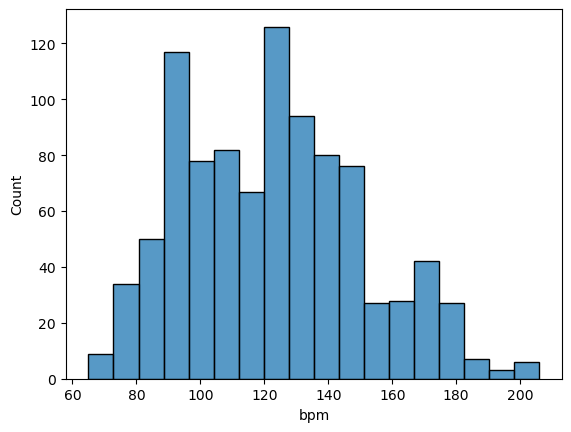

In [5]:
#Daniel - Making a Histogram Pt. 1
#We can make visualizations in Seaborn by highlighting the specific plot type in the sns.plotname piece. Here we make a Histogram
#In this case, we need to specify what the data is (spotify), followed by what we want the x value to be ("bpm"). Since we specified the data source, do not need to do spotify["bpm"]
# Running it just spits out the visualization for us to view
hist1 = sns.histplot(data=spotify,x="bpm") 
hist1.plot()

[]

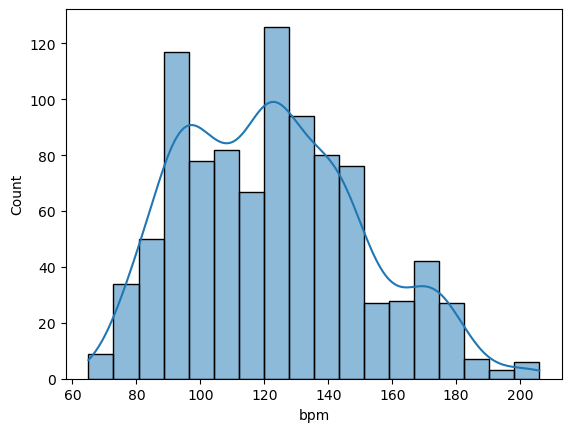

In [6]:
#Daniel - Making a Histogram Pt. 2
#Lets take a histogram further - lets add a line to help us see the distribution. Adding KDE lets us see the distribution of values
hist1 = sns.histplot(data=spotify,x="bpm",kde="true")
hist1.plot()

In [7]:
#Daniel - Prepping Release Month Data Pt. 1
#Now lets start looking at the data more closely. Lets say we want to see how many tracks released each month
#Calling back to last week, we are going to make an array of the total number for each month, calling it releasemonthgroup (can be called whatever though)
releasemonthgroup = spotify.groupby("released_month").count()["track_name"] #This is to start cleaning up the data for a future visualization. This counts all instances of each month in the dataset
releasemonthgroup #running the variable to make sure it actually works and caught them

released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: track_name, dtype: int64

In [8]:
#Daniel - Prepping Release Month Data Pt. 2
#Lets first pull the values out into its own array
releasemonthvalues = releasemonthgroup.values #provides a usable array of the release month values
releasemonthvalues #running to make sure it worked

array([134,  61,  86,  66, 128,  86,  62,  46,  56,  73,  80,  75])

In [9]:
#Daniel - Prepping Release Month Data Pt. 3
#Next, lets gather the index (labels) for the data
releasemonthindex = releasemonthgroup.index #provides an index of the release month column headers
releasemonthindex #Making sure it works

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='released_month')

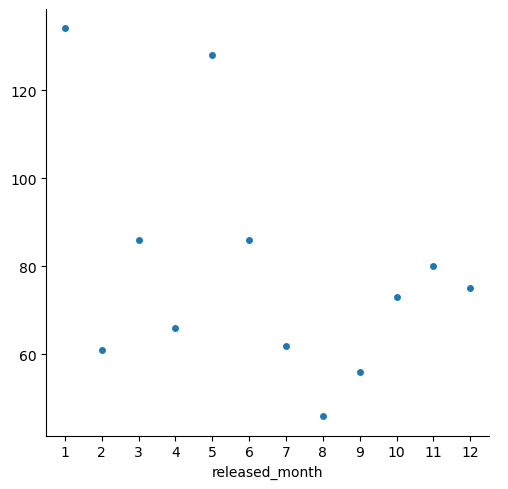

In [10]:
#Larry - Using catplot to make a visualization Pt. 1
#Now that the data is prepped, lets make a bar chart - this lives under the catplot function
#Since we made unique variables for the data outside of the table, we do not have to call data
#This makes a basic dot chart, with a dot indicating what each value is - not very exciting...
cat1 = sns.catplot(x = releasemonthindex, y=releasemonthvalues)
plt.show()


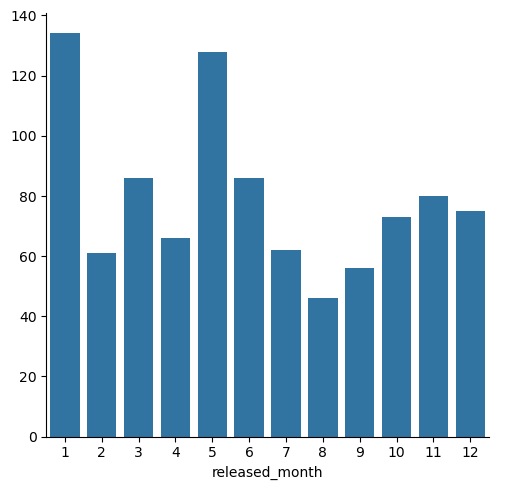

In [11]:
#Larry - Using catplot to make a visualization Pt. 2
#To turn it into a bar chart we need to call "kind" - there are a lot of different values we can use (run kind with hist first to show the error that shows the different kind of charts can be done
cat2 = sns.catplot(x = releasemonthindex, y=releasemonthvalues, kind = "bar")
plt.show()

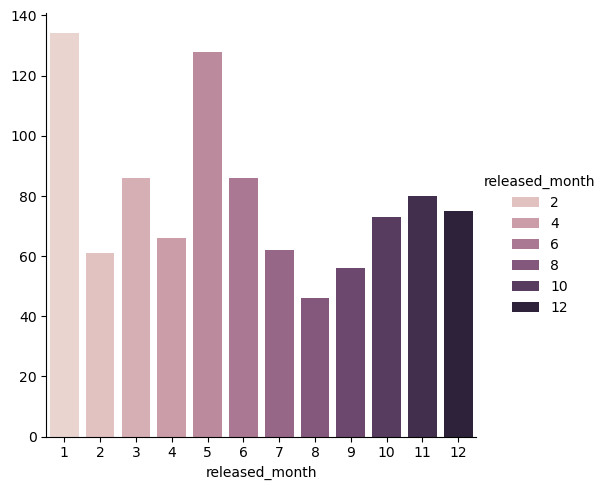

In [12]:
#Larry - Using catplot to make a visualization Pt. 3
#Lets add some color to the chart. You can do this in a few ways. The first is calling hue and assigning a value to it. Not very pretty
cat3= sns.catplot(x=releasemonthindex, y=releasemonthvalues, kind="bar",hue=releasemonthindex) #Turns the releasemonth data into a Bar chart. Also shows an example of specifying what kind of chart is made, the palette function, and hiding the legend
plt.show()

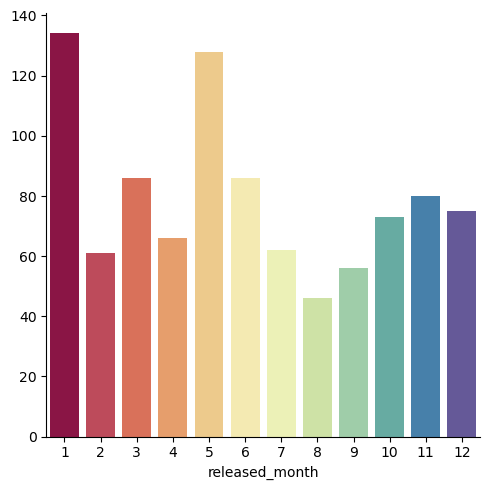

In [13]:
#Larry - Using catplot to make a visualization Pt. 4
#The colors before weren't pretty, but we can specify specific colors if we want. This is where palette comes in
#You can do one of two things - call specific colors or use a palette provided. Lets use Spectral. 
#Since we do not need the legend, can use legend=False to turn it off
cat4 = sns.catplot(x=releasemonthindex, y=releasemonthvalues, kind="bar",hue=releasemonthindex,palette="Spectral",legend=False) #Turns the releasemonth data into a Bar chart. Also shows an example of specifying what kind of chart is made, the palette function, and hiding the legend
plt.show()

In [14]:
#Anyone (w/ Dr/ Silva Assist) - Making it look good Pt. 1
#The current state of the visualization is a bit messy. One of the ways we can change it is by assigning names to the months
releasemonthindex = releasemonthgroup.index #provides an index of the release month column headers
releasemonthindex #running to make sure it worked
releasemonth_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"] #assigns new values to the release month index

In [15]:
#Anyone (w/ Dr/ Silva Assist) - Making it look good Pt. 2
#We also could assign specific colors to the different months to make it look nicer - spectrums don't work too well with the bar chart
# We will take a closer look at the spectrum of colors
sns.color_palette("Spectral", 12) #A closer look at the Spectral palette

[(0.7803152633602461, 0.182160707420223, 0.2968089196462899),
 (0.8996539792387543, 0.340715109573241, 0.2848904267589389),
 (0.9679354094579008, 0.5074202229911572, 0.2996539792387543),
 (0.9923875432525952, 0.6938869665513263, 0.3900807381776239),
 (0.9954632833525567, 0.8476739715494039, 0.519261822376009),
 (0.9985390234525182, 0.9547097270280661, 0.6730488273740869),
 (0.9634755863129566, 0.9853902345251826, 0.6920415224913495),
 (0.8656670511341794, 0.9460207612456749, 0.6034602076124567),
 (0.6841983852364477, 0.8722029988465976, 0.6403690888119954),
 (0.48489042675893923, 0.7940023068050751, 0.6458285274894272),
 (0.30403690888119955, 0.6537485582468281, 0.6913494809688582),
 (0.24006151480199922, 0.47635524798154555, 0.7141868512110727)]

In [16]:
#Anyone (w/ Dr/ Silva Assist) - Making it look good Pt. 3
#We can also take a closer look at what specific colors make up the spectrum we've set out - this spits out RGB values
sns.color_palette("Spectral", 12)[0] #Checking out the first color in the index - spits out the RGB values

(0.7803152633602461, 0.182160707420223, 0.2968089196462899)

In [17]:
#Anyone (w/ Dr/ Silva Assist) - Making it look good Pt. 4
#We can manually reassign the order of the colors in the index
[11, 9, 7, 5, 3, 1, 0, 2, 4, 6, 8, 10] #Reassigning and setting a specific order for the Spectral colors to a specific index

[11, 9, 7, 5, 3, 1, 0, 2, 4, 6, 8, 10]

In [18]:
#Anyone (w/ Dr/ Silva Assist) - Making it look good Pt. 5
#Now that we have an idea of what we want, can make a color palette using what we've been giving
cp = sns.color_palette("Spectral", 12) #specifying what pallete we are looking at and the number of variables
cp[0], cp[1], cp[2], cp[3], cp[4], cp[5], cp[6], cp[7], cp[8], cp[9], cp[10], cp[11] = cp[11], cp[9], cp[7], cp[5], cp[3], cp[1], cp[0], cp[2], cp[4], cp[6], cp[8], cp[10]#Adjusting the order of the variables using the color pallete above
cp #running the variable to make sure it works

[(0.24006151480199922, 0.47635524798154555, 0.7141868512110727),
 (0.48489042675893923, 0.7940023068050751, 0.6458285274894272),
 (0.8656670511341794, 0.9460207612456749, 0.6034602076124567),
 (0.9985390234525182, 0.9547097270280661, 0.6730488273740869),
 (0.9923875432525952, 0.6938869665513263, 0.3900807381776239),
 (0.8996539792387543, 0.340715109573241, 0.2848904267589389),
 (0.7803152633602461, 0.182160707420223, 0.2968089196462899),
 (0.9679354094579008, 0.5074202229911572, 0.2996539792387543),
 (0.9954632833525567, 0.8476739715494039, 0.519261822376009),
 (0.9634755863129566, 0.9853902345251826, 0.6920415224913495),
 (0.6841983852364477, 0.8722029988465976, 0.6403690888119954),
 (0.30403690888119955, 0.6537485582468281, 0.6913494809688582)]

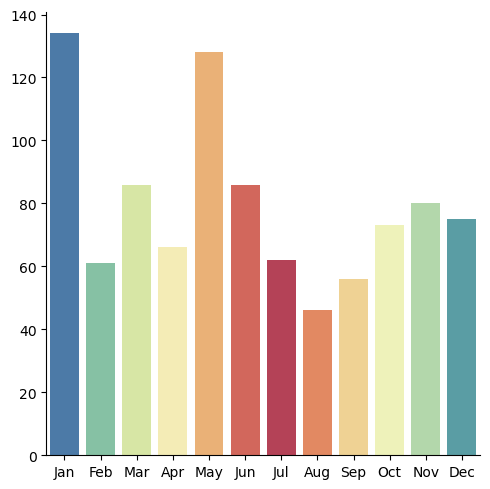

In [19]:
#Anyone (w/ Dr/ Silva Assist) - Making it look good Pt. 6
# Now we can bring all of that together and update our visualization to make it look a lot nicer
cat4 = sns.catplot(x=releasemonth_names, y=releasemonthvalues, kind="bar", hue = releasemonth_names, palette=cp, legend=False) #Revisting the bar chart from earlier, but this time manually assigning colors via the palette we made
plt.show()

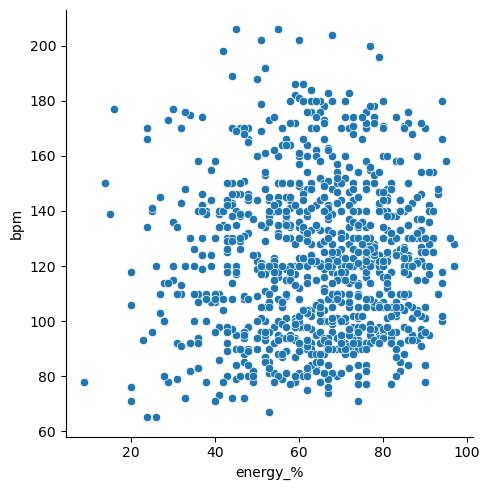

In [20]:
#Larry - Making a relplot
#Switching gears from catplot, you can use relplot to show how two variables compare. In our case, we are using energy% and bpm. We could alternate with any % and it would work
#By default, relplot will spit out a scatter plot
rel1 = sns.relplot(data=spotify, x="energy_%", y="bpm") #Now moving from catplot to relplot, this is just showing how you can plug values in and it'll spit out a visualization
plt.show()

In [21]:
#Larry - Reviewing the mode data
# So we have our scatter plot, but it is pretty cluttered and hard to tell what is going on.
#To remedy this, we should introduce some variables to make the look of the plot look good. 
#A contender to adjust the plots is the "mode" value - to check what it is, we will do a count of the values to see how many there are
#There are 2, so it would be good to take a look at how mode impacts the data
modelist = spotify.groupby("mode").count()["track_name"] #Doing a quick check to see how many different items are under the Mode column
modelist #Doing the actual check of the mode and items. See there are only two, so a great choice for a binary item

mode
Major    550
Minor    403
Name: track_name, dtype: int64

In [22]:
#Anyone (w/ Dr/ Silva Assist) - Applying month names
#If we want to add the month names to the visualization, we can rename them - below is calling back to last week
# We are making a new column that is categorical data w/ released_month values
#We are then renaming those categories using the releasemonth_names we used earlier
spotify['month_cat'] = spotify['released_month'].astype('category') #makes a new column with variables that are categories - pulls the released_month values
spotify['month_cat'] = spotify['month_cat'].cat.rename_categories(releasemonth_names) #transferring and renaming the variables to month names

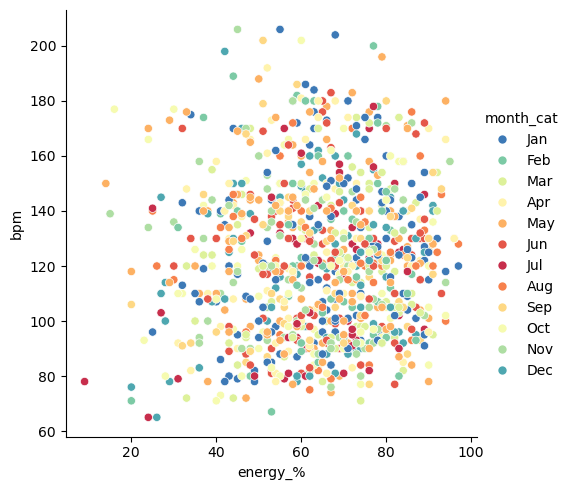

In [23]:
#Larry - Adjusting aesthetics using other variables Pt. 1
#Let's revisit the earlier plot that looks at energy% and bpm. There are three "approaches" we can take to adjusting it. The first, we already talked about (hue)
#If we add hue to the scatter plot using the month category we made, we can change the color of the dots
rel2 = sns.relplot(data=spotify, x="energy_%", y="bpm",hue="month_cat", palette=cp) #Revisiting the plot from earlier, now we are adding style and hue to customize the look of it (getting at the different ways to showcase it)
plt.show()

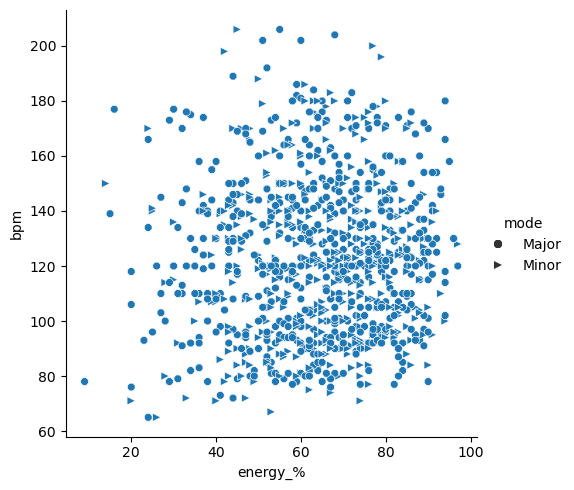

In [24]:
#Larry - Adjusting aesthetics using other variables Pt. 2
#Another aesthetic change we can make is to "style." Style changes the look of the dots.
#There are a few different styles you can choose from - it will rotate through different styles by default, but you can call out different styles by specifying the shape using the markers parameter
rel3 = sns.relplot(data=spotify, x="energy_%", y="bpm",style="mode",markers=["8",">"]) #Revisiting the plot from earlier, now we are adding style and hue to customize the look of it (getting at the different ways to showcase it)
plt.show()

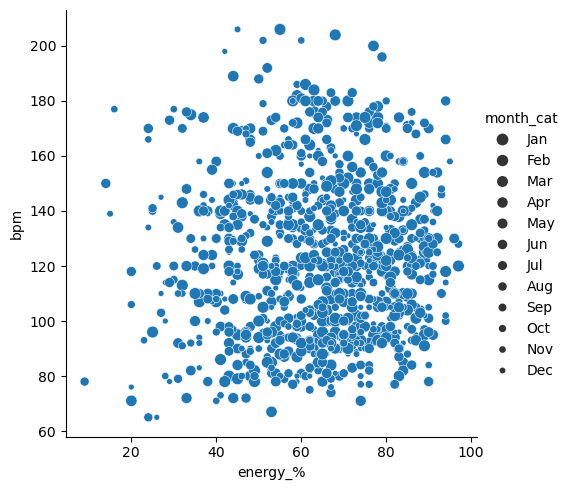

In [25]:
#Larry - Adjusting aesthetics using other variables Pt. 3
#Stepping away from mode for a second, another adjustment you can make is to size - we will call out month_cat as the variable that impacts size
#This could be more helpful if we wanted to make the dots different sizes, but it doesn't help too much (how can you tell the difference when there are so many?)
rel4 = sns.relplot(data=spotify, x="energy_%", y="bpm",size="month_cat") 
plt.show()

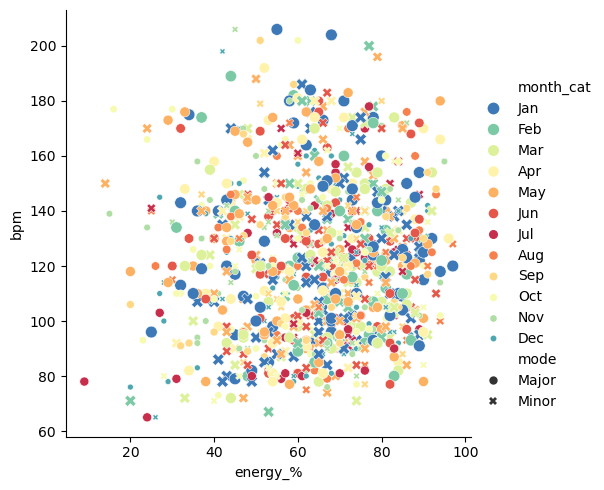

In [34]:
#Larry - Adjusting aesthetics using other variables Pt. 4
#Just because, here is what it looks like if you adjust ALL the variables and add it in
#It can help tell them apart, but is kind of a mess, right?
rel5 = sns.relplot(data=spotify, x="energy_%", y="bpm",style="mode",hue="month_cat",palette=cp,size="month_cat") #Revisiting the plot from earlier, now we are adding style and hue to customize the look of it (getting at the different ways to showcase it)
plt.show()

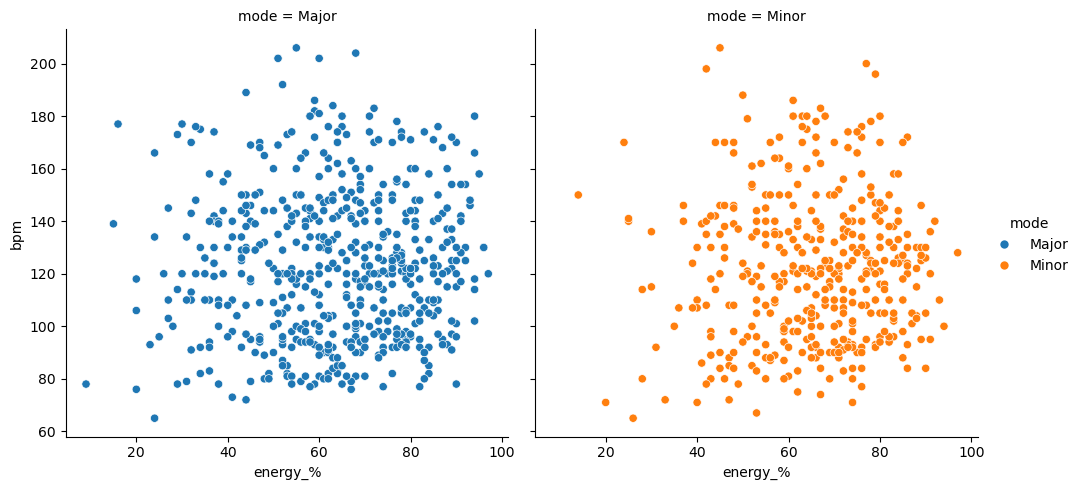

In [28]:
#Sandy - Relplot w/ multiple columns Pt. 1
# A remedy to having so many dots across the table is to break it into multiple figures
# This is easy to do - you just need to add the col parameter and specify what you want it to go by - this will create multiple figures
rel6 = sns.relplot(data=spotify, x="energy_%", y="bpm",col="mode",hue="mode") #An alternative way of doing things - instead of flooding it with aesthetic stuff, making multiple tables to show when there are two options. Also hiding the legend
plt.show()

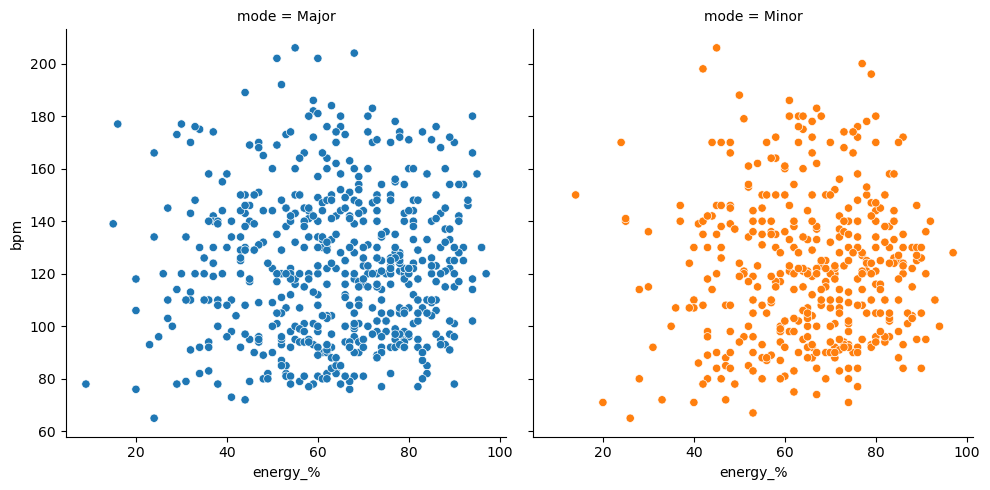

In [29]:
#Sandy - Relplot w/ multiple columns Pt. 2
#With two tables, it is much easier to see how many different values there are!
#However, having the legend isn't necessary - there are different titles for each figure
#To remedy this, we can add legend = False to hide it
rel7 = sns.relplot(data=spotify, x="energy_%", y="bpm",col="mode",hue="mode",legend=False) #An alternative way of doing things - instead of flooding it with aesthetic stuff, making multiple tables to show when there are two options. Also hiding the legend
plt.show()

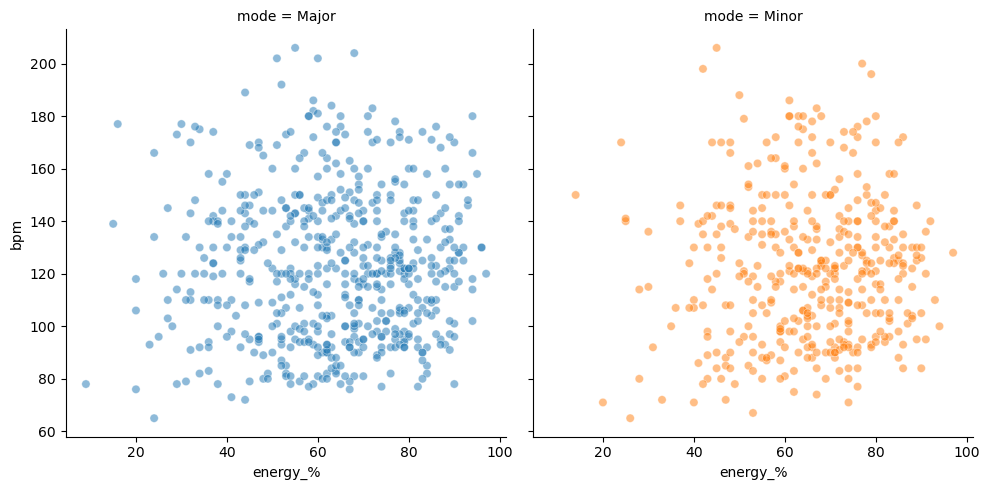

In [30]:
#Sandy - Relplot w/ multiple columns Pt. 3
#Despite this, there are a lot of dots that are overlapping
#A remedy would be to introduce transparency via alpha - 1 is darker, 0 is lighter, so just follow the spectrum to control how transparent you want them
rel8 = sns.relplot(data=spotify, x="energy_%", y="bpm",col="mode",hue="mode",alpha=.5,legend=False) #An alternative way of doing things - instead of flooding it with aesthetic stuff, making multiple tables to show when there are two options. Also hiding the legend
plt.show()

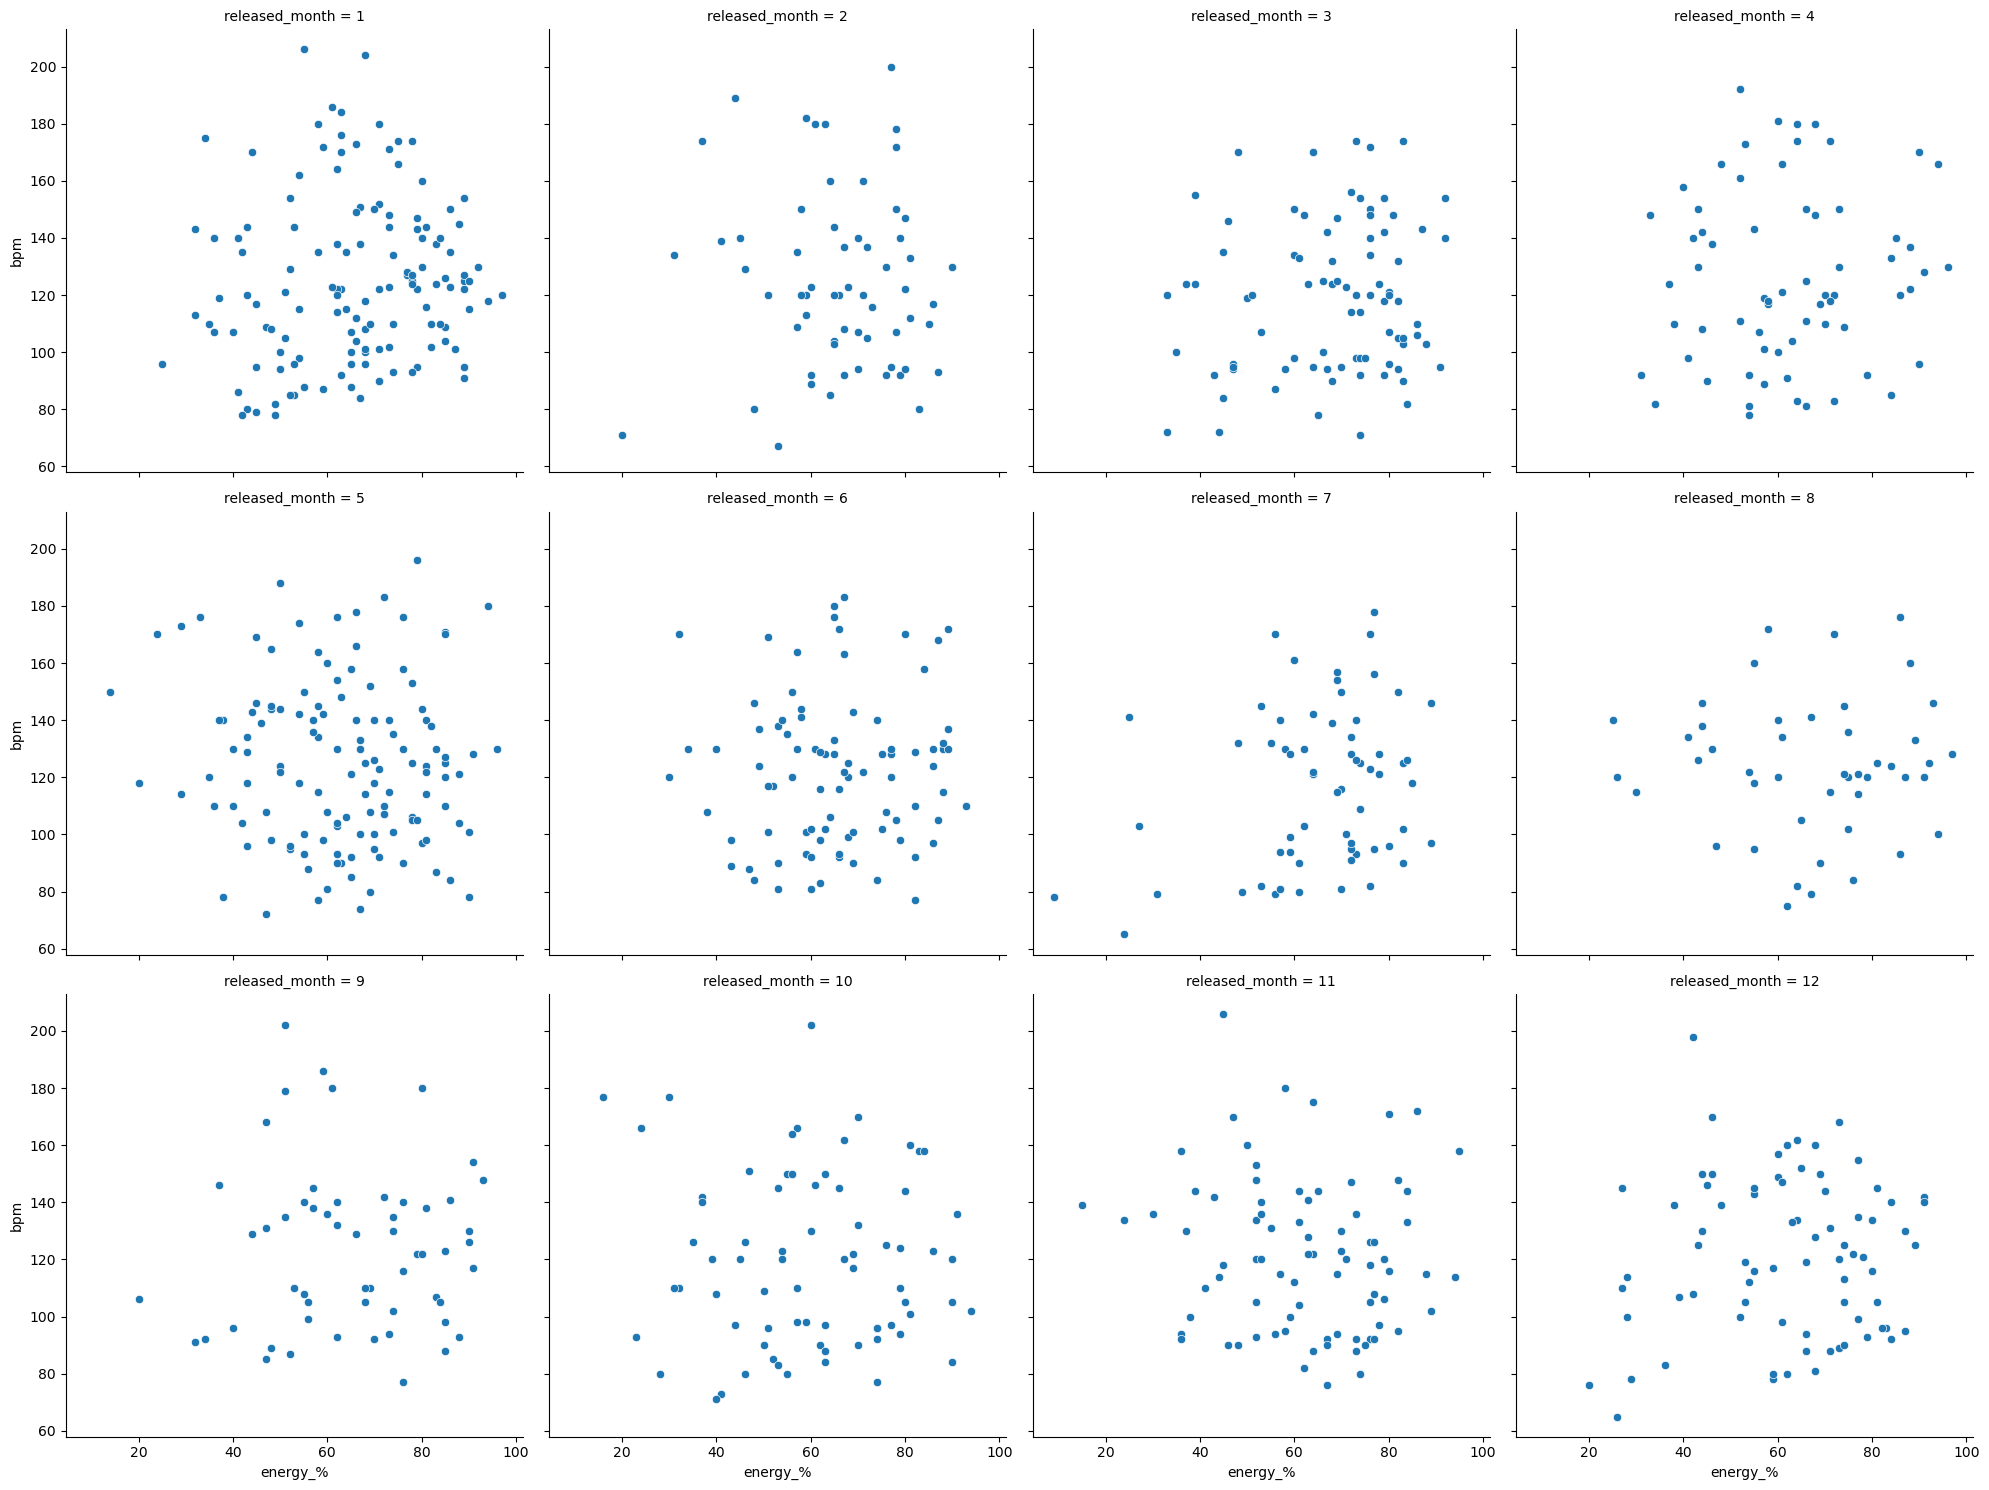

In [31]:
#Sandy - Column wrapping
# For another perspective with column wrap, we can specify how many figures we want to make before starting a new row.
#col_wrap will let us control how many columns we have, and that can help make it look nice
#For an example, lets use "released_month" and specify the wrapping at 4 (12 months/4 columns = 3 rows)
rel9 = sns.relplot(data=spotify, x="energy_%", y="bpm",col="released_month",col_wrap=4) #Last big push - revisiting the wrap function - what happens when you have a lot of items you want to sort by, you can view the different data
plt.show()